<a href="https://www.kaggle.com/code/tusharaggarwal27/hottest-topics-in-ml?scriptVersionId=116480817" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:180%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
           🌶️♨️💹Hottest Topics in ML🌶️♨️💹
            
</p>
<style>
        h1{text-align: center;}
 </style>  
    
</div>

<p style="font-family:cursive; font-size:25px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;font-size:23px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>

<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
    <b>In this project, I am using Natural Language Processing on NIPS papers to uncover the trendiest topics in machine learning research,</b>
    
</div>
<div class="alert alert-info" role="alert" style="font-size:15px;border-radius:20px">
    <b>Some things to note:</b>
    <br><br>Neural Information Processing Systems (NIPS) is one of the top machine learning conferences in the world where groundbreaking work is published. 
    <br><br>
    In this project, I am going to analyze a large collection of NIPS research papers from the past decade to discover the latest trends in machine learning.
    <br><br>
    The techniques used here to handle large amounts of data can be applied to other text datasets as well.
</div>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Importing the required Libraries

 

    
   </p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA

<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
    <b>Loading the NIPS papers,</b>
    
</div>
<div class="alert alert-info" role="alert" style="font-size:15px;border-radius:20px">
    <b>Some things to note:</b>
    <br><br>The NIPS conference (Neural Information Processing Systems) is one of the most prestigious yearly events in the machine learning community. At each NIPS conference, a large number of research papers are published. Over 50,000 PDF files were automatically downloaded and processed to obtain a dataset on various machine learning techniques. These NIPS papers are stored in datasets/papers.csv. The CSV file contains information on the different NIPS papers that were published from 1987 until 2017 (30 years!). These papers discuss a wide variety of topics in machine learning, from neural networks to optimization methods and many more.
    <br><br>
    A research paper typically consists of a title, an abstract and the main text. Other data such as figures and tables were not extracted from the PDF files. Each paper discusses a novel technique or improvement. In this analysis, we will focus on analyzing these papers with natural language processing methods.
</div>

In [2]:
# Reading papers.csv into papers
papers = pd.read_csv("/kaggle/input/nips-papers/papers.csv")

# Printing out the first rows of papers
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Preparing the data for analysis

 

    
   </p>

<div class="alert alert-info" role="alert" style="font-size:15px;border-radius:20px">
   For the analysis of these papers, I will use the text data associated with the paper as well as the year the paper was published in.
    <br><br>
    Also I will analyze this text data using natural language processing. Since the file contains some metadata such as id's and filenames, it can be removed .
</div>

In [3]:
# Removing the columns
papers.drop(['id','event_type','pdf_name'],axis=1,inplace=True)

# Printing for checking the first rows of papers
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Plotting how machine learning has evolved over time

   </p>

<div class="alert alert-info" role="alert" style="font-size:15px;border-radius:20px">
  Visualizing the number of publications per year.
    <br><br>
    From this I understood the extent of the machine learning 'revolution'!this significant increase in popularity is attributed to the large amounts of compute power, data and improvements in algorithms.
</div>

<AxesSubplot:xlabel='year'>

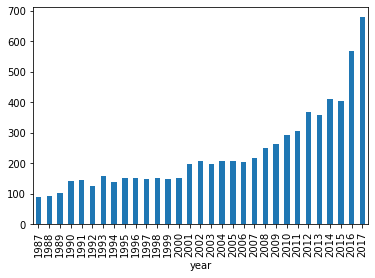

In [4]:
# Groupping the papers by year
groups = papers.groupby('year')

# Determining the size of each group
counts = groups.size()

# Visualising the counts as a bar plot
counts.plot(kind='bar')

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Preprocessing the text data

   </p>

<div class="alert alert-info" role="alert" style="font-size:15px;border-radius:20px">
  Analyzing the titles of the different papers to identify machine learning trends
    <br><br>
    I am using regular expression(re) to remove any punctuation in the title, then performing lowercasing

</div>

In [5]:
# Printing the titles of the first rows 
print(papers['title'].head())

# Removing the punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Converting now the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Printing now the processed titles of the first rows 
papers['title_processed'].head()

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">A word cloud to visualize the preprocessed text data

   </p>

<div class="alert alert-info" role="alert" style="font-size:15px;border-radius:20px">
    For most common words, using WordCloud
   
</div>

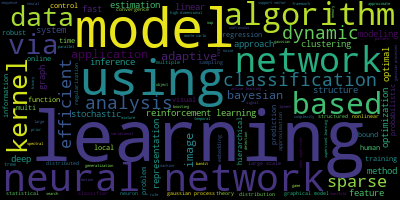

In [6]:
# Joining the different processed titles togetheras required by WordCloud
long_string = ' '.join(papers['title_processed'])

# Creating a WordCloud object, generate a wordcloud and visualising it
wordcloud = wordcloud.WordCloud()

# Generating a word cloud
wordcloud.generate(long_string)

# Visualizing the word cloud to see preprocessing
wordcloud.to_image()

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Preparing the text for LDA analysis

   </p>

<div class="alert alert-info" role="alert" style="font-size:15px;border-radius:20px">
The main text analysis method that I will be using the latent Dirichlet allocation (LDA). LDA is able to perform topic detection on large document sets, determining what the main 'topics' are in a large unlabeled set of texts. A 'topic' is a collection of words that tend to co-occur often. The hypothesis is that LDA might be able to clarify what the different topics in the research titles are. These topics can then be used as a starting point for further analysis.
    <br><br>
    LDA does not work directly on text data. First, it is necessary to convert the documents into a simple vector representation. This representation will then be used by LDA to determine the topics. Each entry of a 'document vector' will correspond with the number of times a word occurred in the document. In conclusion, we will convert a list of titles into a list of vectors, all with length equal to the vocabulary. So, for Analyzing machine learning trends with neural networks.' would be transformed into [1, 0, 1, ..., 1, 0].
    <br><br>
   I will then plot the 10 most common words based on the outcome of this operation (the list of document vectors). As a check, these words should also occur in the word cloud.
   
</div>

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


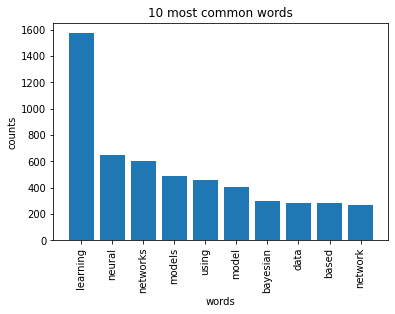

In [7]:
# Defining the Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialising the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fitting and transformin the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualising now the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, Analysing trends with LDA

   </p>

<div class="alert alert-info" role="alert" style="font-size:15px;border-radius:20px">
The research titles, I will be analyzing using LDA. Note that in order to process a new set of documents (e.g. news articles), a similar set of steps will be required to preprocess the data. The flow that was constructed here can thus easily be exported for a new text dataset.
    <br><br>
    The only parameter that needs tweaking is the number of topics in the LDA algorithm. Typically, one would calculate the 'perplexity' metric to determine which number of topics is best and iterate over different amounts of topics until the lowest 'perplexity' is found. For now, trying with a different number of topics. From there, I can distinguish what each topic is about ('neural networks', 'reinforcement learning', 'kernel methods', 'gaussian processes', etc.).
   </div>

In [8]:
#Defining the Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweaking the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Creating and fitting the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Printing the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
models analysis robust detection matrix rank low bayesian linear data

Topic #1:
gaussian processes process markov learning decision image models inference reduction

Topic #2:
learning clustering vector propagation support functions machines belief networks spectral

Topic #3:
inference learning information bayesian models variational object based probabilistic matching

Topic #4:
neural networks network learning using recurrent based feature representations model

Topic #5:
models time learning data graphical multi using spike model modeling

Topic #6:
learning kernel reinforcement sparse online adaptive high estimation random multi

Topic #7:
learning optimization stochastic function approximation using linear algorithm optimal online

Topic #8:
model networks learning deep neural supervised semi generative using training

Topic #9:
algorithm gradient descent learning policy programming minimization algorithms analysis bayesian


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">The future of machine learning starts with these papers

   </p>

<div class="alert alert-info" role="alert" style="font-size:15px;border-radius:20px">
Machine learning has become increasingly popular over the past years. The number of NIPS conference papers has risen exponentially, and people are continuously looking for ways on how they can incorporate machine learning into their products and services.
    <br><br>
    Although this analysis focused on analyzing machine learning trends in research, a lot of these techniques are rapidly being adopted in industry.
   </div>

<p style="font-family:cursive; font-size:25px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>
​
​
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;font-size:23px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
​
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>